In [1]:
import import_ipynb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import sklearn
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
import utils as ut

importing Jupyter notebook from utils.ipynb


In [2]:
dd=pd.read_csv('/Users/vaibhavwali/Desktop/2020257_HW4/Dataset Description.csv')
mt5k=pd.read_csv('/Users/vaibhavwali/Desktop/2020257_HW4/more_than_50k.csv')
ppln=pd.read_csv('/Users/vaibhavwali/Desktop/2020257_HW4/population.csv')
dd
ppln.info()
# ppln.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 40 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AAGE      199523 non-null  int64 
 1   ACLSWKR   199523 non-null  object
 2   ADTIND    199523 non-null  int64 
 3   ADTOCC    199523 non-null  int64 
 4   AHGA      199523 non-null  object
 5   AHRSPAY   199523 non-null  int64 
 6   AHSCOL    199523 non-null  object
 7   AMARITL   199523 non-null  object
 8   AMJIND    199523 non-null  object
 9   AMJOCC    199523 non-null  object
 10  ARACE     199523 non-null  object
 11  AREORGN   199523 non-null  object
 12  ASEX      199523 non-null  object
 13  AUNMEM    199523 non-null  object
 14  AUNTYPE   199523 non-null  object
 15  AWKSTAT   199523 non-null  object
 16  CAPGAIN   199523 non-null  int64 
 17  CAPLOSS   199523 non-null  int64 
 18  DIVVAL    199523 non-null  int64 
 19  FILESTAT  199523 non-null  object
 20  GRINREG   199523 non-null 

In [3]:
dd

,Column Code,Distict Values,Column,Type
0,AAGE,91,age,numerical
1,ACLSWKR,9,class of worker,categorical
2,ADTIND,52,industry code,categorical
3,ADTOCC,47,occupation code,categorical
4,AHGA,17,education,categorical
5,AHRSPAY,1240,wage per hour,numerical
6,AHSCOL,3,enrolled in edu inst last wk,categorical
7,AMARITL,7,marital status,categorical
8,AMJIND,24,major industry code,categorical
9,AMJOCC,15,major occupation code,categorical


In [4]:
#preprocessing of data
print(ppln.isnull().sum())
for i in ppln:
    check=ppln[i]
    check[check==' ?']=np.nan

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AHRSPAY     0
AHSCOL      0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
AREORGN     0
ASEX        0
AUNMEM      0
AUNTYPE     0
AWKSTAT     0
CAPGAIN     0
CAPLOSS     0
DIVVAL      0
FILESTAT    0
GRINREG     0
GRINST      0
HHDFMX      0
HHDREL      0
MIGMTR1     0
MIGMTR3     0
MIGMTR4     0
MIGSAME     0
MIGSUN      0
NOEMP       0
PARENT      0
PEFNTVTY    0
PEMNTVTY    0
PENATVTY    0
PRCITSHP    0
SEOTR       0
VETQVA      0
VETYN       0
WKSWORK     0
YEAR        0
dtype: int64


/var/folders/_9/3zz2tqt94w93p3ygh579l6h00000gn/T/ipykernel_10936/3862203418.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check[check==' ?']=np.nan


In [5]:
print(ppln.isnull().sum())
print(ppln.shape)
ptgs=[]
print("----------------------")
for i in ppln:
    count=ppln[i].isnull().sum()
    ptgs.append((i,count/len(ppln)))
    
    if(ptgs[-1][1]>0.3):
        ppln=ppln.drop(i,axis=1)
        
print("Columns with more than 30% of missing data: ")
for i in ptgs:
    if(i[1]>0.3):
        print(i[0])
print ("----------------------")
print("Remaining columns: ")
print(ppln.isnull().sum())
print(ppln.shape)

AAGE            0
ACLSWKR         0
ADTIND          0
ADTOCC          0
AHGA            0
AHRSPAY         0
AHSCOL          0
AMARITL         0
AMJIND          0
AMJOCC          0
ARACE           0
AREORGN         0
ASEX            0
AUNMEM          0
AUNTYPE         0
AWKSTAT         0
CAPGAIN         0
CAPLOSS         0
DIVVAL          0
FILESTAT        0
GRINREG         0
GRINST        708
HHDFMX          0
HHDREL          0
MIGMTR1     99696
MIGMTR3     99696
MIGMTR4     99696
MIGSAME         0
MIGSUN      99696
NOEMP           0
PARENT          0
PEFNTVTY     6713
PEMNTVTY     6119
PENATVTY     3393
PRCITSHP        0
SEOTR           0
VETQVA          0
VETYN           0
WKSWORK         0
YEAR            0
dtype: int64
(199523, 40)
----------------------
Columns with more than 30% of missing data: 
MIGMTR1
MIGMTR3
MIGMTR4
MIGSUN
----------------------
Remaining columns: 
AAGE           0
ACLSWKR        0
ADTIND         0
ADTOCC         0
AHGA           0
AHRSPAY        0
AHSCOL    

In [6]:
print("Numerical data exists in these columns")
for i in (ppln):
    if(type(ppln[i][0])!=type('a')):
        print(i)

Numerical data exists in these columns
AAGE
ADTIND
ADTOCC
AHRSPAY
CAPGAIN
CAPLOSS
DIVVAL
NOEMP
SEOTR
VETYN
WKSWORK
YEAR


In [7]:
for column in ppln.columns:
    ppln[column].fillna(ppln[column].mode()[0], inplace=True)
print(ppln.isnull().sum())

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AHRSPAY     0
AHSCOL      0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
AREORGN     0
ASEX        0
AUNMEM      0
AUNTYPE     0
AWKSTAT     0
CAPGAIN     0
CAPLOSS     0
DIVVAL      0
FILESTAT    0
GRINREG     0
GRINST      0
HHDFMX      0
HHDREL      0
MIGSAME     0
NOEMP       0
PARENT      0
PEFNTVTY    0
PEMNTVTY    0
PENATVTY    0
PRCITSHP    0
SEOTR       0
VETQVA      0
VETYN       0
WKSWORK     0
YEAR        0
dtype: int64


AAGE adult             108231
AAGE senior citizen     30397
AAGE child              25212
AAGE teenager           16541
AAGE infant              9653
AAGE toddler             6650
Name: Age Category, dtype: int64


,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,...,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,Age Category
0,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,AAGE senior citizen
1,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,AAGE adult
2,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,AAGE teenager
3,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,AAGE child
4,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,AAGE child


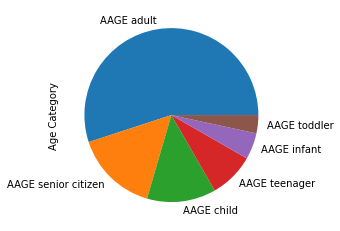

In [8]:
# print(ppln['AAGE'])
bins = [0,3,5,13,19,60,100]
labels = ['AAGE infant','AAGE toddler','AAGE child','AAGE teenager','AAGE adult','AAGE senior citizen']
ppln['Age Category'] = pd.cut(ppln['AAGE'],bins,labels = labels)
print(ppln['Age Category'].value_counts())
ppln['Age Category'].value_counts().plot(kind = 'pie')
ppln = ppln.drop(['AAGE'],axis=1)
ppln.head()

AHRSPAY BPL             188367
AHRSPAY AVERAGE WAGE     10495
AHRSPAY GOOD WAGE          393
AHRSPAY BAD WAGE           164
AHRSPAY GREAT WAGE         104
Name: AHRSPAY Category, dtype: int64


,ACLSWKR,ADTIND,ADTOCC,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,...,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,Age Category,AHRSPAY Category
0,Not in universe,0,0,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,AAGE senior citizen,AHRSPAY BPL
1,Self-employed-not incorporated,4,34,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,AAGE adult,AHRSPAY BPL
2,Not in universe,0,0,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,...,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,AAGE teenager,AHRSPAY BPL
3,Not in universe,0,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,...,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,AAGE child,AHRSPAY BPL
4,Not in universe,0,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,...,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,AAGE child,AHRSPAY BPL
5,Private,40,10,Some college but no degree,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,...,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,AAGE adult,AHRSPAY AVERAGE WAGE
6,Private,34,3,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,AAGE adult,AHRSPAY BPL
7,Private,4,40,High school graduate,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,30,95,AAGE adult,AHRSPAY BPL
8,Local government,43,26,Some college but no degree,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,White,All other,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,AAGE adult,AHRSPAY AVERAGE WAGE
9,Private,4,37,Some college but no degree,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,White,All other,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,AAGE adult,AHRSPAY BPL


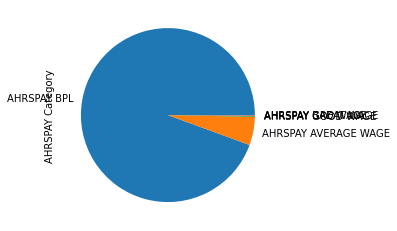

In [9]:
# ppln['AHRSPAY']
bins = [-1,300,400,2000,3000,10000]
labels = ['AHRSPAY BPL','AHRSPAY BAD WAGE','AHRSPAY AVERAGE WAGE','AHRSPAY GOOD WAGE','AHRSPAY GREAT WAGE']
ppln['AHRSPAY Category'] = pd.cut(ppln['AHRSPAY'],bins,labels = labels)
print(ppln['AHRSPAY Category'].value_counts())
ppln['AHRSPAY Category'].value_counts().plot(kind = 'pie')
ppln = ppln.drop(['AHRSPAY'],axis=1)
ppln.head(10)

CAPGAIN VERY LOW GAINS    192352
CAPGAIN AVERAGE GAINS       4762
CAPGAIN GOOD GAINS          1456
CAPGAIN LOW GAINS            563
CAPGAIN GREAT GAINS          390
Name: CAPGAINS Category, dtype: int64


,ACLSWKR,ADTIND,ADTOCC,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,...,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,Age Category,AHRSPAY Category,CAPGAINS Category
0,Not in universe,0,0,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,...,United-States,Native- Born in the United States,0,Not in universe,2,0,95,AAGE senior citizen,AHRSPAY BPL,CAPGAIN VERY LOW GAINS
1,Self-employed-not incorporated,4,34,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,...,United-States,Native- Born in the United States,0,Not in universe,2,52,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS
2,Not in universe,0,0,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,...,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,AAGE teenager,AHRSPAY BPL,CAPGAIN VERY LOW GAINS
3,Not in universe,0,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,...,United-States,Native- Born in the United States,0,Not in universe,0,0,94,AAGE child,AHRSPAY BPL,CAPGAIN VERY LOW GAINS
4,Not in universe,0,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,...,United-States,Native- Born in the United States,0,Not in universe,0,0,94,AAGE child,AHRSPAY BPL,CAPGAIN VERY LOW GAINS
5,Private,40,10,Some college but no degree,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,...,United-States,Native- Born in the United States,2,Not in universe,2,52,95,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS
6,Private,34,3,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,...,United-States,Native- Born in the United States,0,Not in universe,2,52,94,AAGE adult,AHRSPAY BPL,CAPGAIN AVERAGE GAINS
7,Private,4,40,High school graduate,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,...,United-States,Native- Born in the United States,0,Not in universe,2,30,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS
8,Local government,43,26,Some college but no degree,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,White,All other,...,United-States,Native- Born in the United States,0,Not in universe,2,52,95,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS
9,Private,4,37,Some college but no degree,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,White,All other,...,United-States,Native- Born in the United States,0,Not in universe,2,52,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS


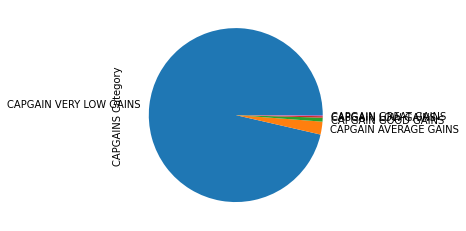

In [10]:
ppln['CAPGAIN']
bins = [-1,1000,2000,10000,50000,100000]
labels = ['CAPGAIN VERY LOW GAINS','CAPGAIN LOW GAINS','CAPGAIN AVERAGE GAINS','CAPGAIN GOOD GAINS','CAPGAIN GREAT GAINS']
ppln['CAPGAINS Category'] = pd.cut(ppln['CAPGAIN'],bins,labels = labels)
print(ppln['CAPGAINS Category'].value_counts())
ppln['CAPGAINS Category'].value_counts().plot(kind = 'pie')
ppln = ppln.drop(columns=['CAPGAIN'],axis=1)
ppln.head(10)

CAPLOSS VERY LOW CAPLOSS    195617
CAPLOSS AVERAGE CAPLOSS       2832
CAPLOSS GOOD CAPLOSS           950
CAPLOSS GREAT CAPLOSS           74
CAPLOSS LOW CAPLOSS             50
Name: CAPLOSS Category, dtype: int64


,ACLSWKR,ADTIND,ADTOCC,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,...,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,Age Category,AHRSPAY Category,CAPGAINS Category,CAPLOSS Category
0,Not in universe,0,0,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,...,Native- Born in the United States,0,Not in universe,2,0,95,AAGE senior citizen,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS
1,Self-employed-not incorporated,4,34,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,...,Native- Born in the United States,0,Not in universe,2,52,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS
2,Not in universe,0,0,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,...,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,AAGE teenager,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS
3,Not in universe,0,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,...,Native- Born in the United States,0,Not in universe,0,0,94,AAGE child,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS
4,Not in universe,0,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,...,Native- Born in the United States,0,Not in universe,0,0,94,AAGE child,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS
5,Private,40,10,Some college but no degree,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,...,Native- Born in the United States,2,Not in universe,2,52,95,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS
6,Private,34,3,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,...,Native- Born in the United States,0,Not in universe,2,52,94,AAGE adult,AHRSPAY BPL,CAPGAIN AVERAGE GAINS,CAPLOSS VERY LOW CAPLOSS
7,Private,4,40,High school graduate,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,...,Native- Born in the United States,0,Not in universe,2,30,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS
8,Local government,43,26,Some college but no degree,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,White,All other,...,Native- Born in the United States,0,Not in universe,2,52,95,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS
9,Private,4,37,Some college but no degree,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,White,All other,...,Native- Born in the United States,0,Not in universe,2,52,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS


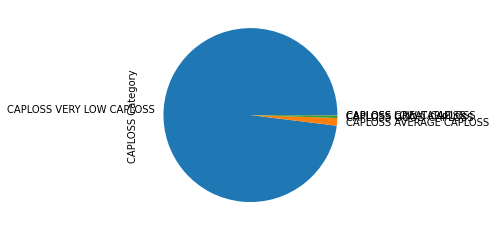

In [11]:
ppln['CAPLOSS'].mean()
bins = [-1,30,500,2000,3000,5000]
labels = ['CAPLOSS VERY LOW CAPLOSS','CAPLOSS LOW CAPLOSS','CAPLOSS AVERAGE CAPLOSS','CAPLOSS GOOD CAPLOSS','CAPLOSS GREAT CAPLOSS']
ppln['CAPLOSS Category'] = pd.cut(ppln['CAPLOSS'],bins,labels = labels)
print(ppln['CAPLOSS Category'].value_counts())
ppln['CAPLOSS Category'].value_counts().plot(kind = 'pie')
ppln = ppln.drop(['CAPLOSS'],axis=1)
ppln.head(10)

DIVVAL VERY LOW    185043
DIVVAL AVERAGE       6668
DIVVAL LOW           6175
DIVVAL GOOD          1504
DIVVAL GREAT          133
Name: DIVVAL Category, dtype: int64


,ACLSWKR,ADTIND,ADTOCC,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,...,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,Age Category,AHRSPAY Category,CAPGAINS Category,CAPLOSS Category,DIVVAL Category
0,Not in universe,0,0,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,...,0,Not in universe,2,0,95,AAGE senior citizen,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW
1,Self-employed-not incorporated,4,34,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,...,0,Not in universe,2,52,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW
2,Not in universe,0,0,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,...,0,Not in universe,2,0,95,AAGE teenager,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW
3,Not in universe,0,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,...,0,Not in universe,0,0,94,AAGE child,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW
4,Not in universe,0,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,...,0,Not in universe,0,0,94,AAGE child,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW
5,Private,40,10,Some college but no degree,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,...,2,Not in universe,2,52,95,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW
6,Private,34,3,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,...,0,Not in universe,2,52,94,AAGE adult,AHRSPAY BPL,CAPGAIN AVERAGE GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW
7,Private,4,40,High school graduate,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,...,0,Not in universe,2,30,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW
8,Local government,43,26,Some college but no degree,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,White,All other,...,0,Not in universe,2,52,95,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW
9,Private,4,37,Some college but no degree,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,White,All other,...,0,Not in universe,2,52,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW


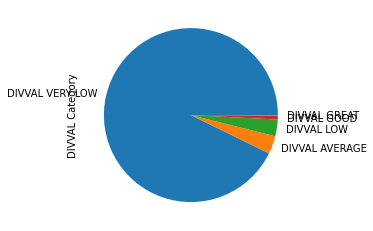

In [12]:
ppln['DIVVAL'].max()
bins = [-1,100,500,5000,30000,100000]
labels = ['DIVVAL VERY LOW','DIVVAL LOW','DIVVAL AVERAGE','DIVVAL GOOD','DIVVAL GREAT']
ppln['DIVVAL Category'] = pd.cut(ppln['DIVVAL'],bins,labels = labels)
print(ppln['DIVVAL Category'].value_counts())
ppln['DIVVAL Category'].value_counts().plot(kind = 'pie')
ppln = ppln.drop(['DIVVAL'],axis=1)
ppln.head(10)

WKSWORK VERY LOW    101245
WKSWORK GREAT        79287
WKSWORK GOOD          6952
WKSWORK AVERAGE       6149
WKSWORK LOW           5890
Name: Weeks Worked Category, dtype: int64


,ACLSWKR,ADTIND,ADTOCC,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,...,SEOTR,VETQVA,VETYN,YEAR,Age Category,AHRSPAY Category,CAPGAINS Category,CAPLOSS Category,DIVVAL Category,Weeks Worked Category
0,Not in universe,0,0,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,...,0,Not in universe,2,95,AAGE senior citizen,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW
1,Self-employed-not incorporated,4,34,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,...,0,Not in universe,2,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT
2,Not in universe,0,0,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,...,0,Not in universe,2,95,AAGE teenager,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW
3,Not in universe,0,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,...,0,Not in universe,0,94,AAGE child,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW
4,Not in universe,0,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,...,0,Not in universe,0,94,AAGE child,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW
5,Private,40,10,Some college but no degree,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,...,2,Not in universe,2,95,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT
6,Private,34,3,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,...,0,Not in universe,2,94,AAGE adult,AHRSPAY BPL,CAPGAIN AVERAGE GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT
7,Private,4,40,High school graduate,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,...,0,Not in universe,2,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK AVERAGE
8,Local government,43,26,Some college but no degree,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,White,All other,...,0,Not in universe,2,95,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT
9,Private,4,37,Some college but no degree,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,White,All other,...,0,Not in universe,2,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT


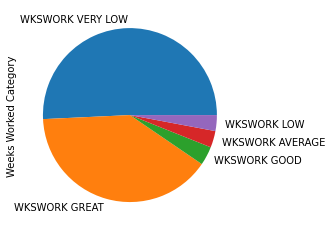

In [13]:
ppln['WKSWORK']
bins = [-1,10,20,30,40,54]
labels = ['WKSWORK VERY LOW','WKSWORK LOW','WKSWORK AVERAGE','WKSWORK GOOD','WKSWORK GREAT']
ppln['Weeks Worked Category'] = pd.cut(ppln['WKSWORK'],bins,labels = labels)
print(ppln['Weeks Worked Category'].value_counts())
ppln['Weeks Worked Category'].value_counts().plot(kind = 'pie')
ppln = ppln.drop(['WKSWORK'],axis=1)
ppln.head(10)

ADTIND VERY LOW    110807
ADTIND GOOD         39173
ADTIND GREAT        28794
ADTIND AVERAGE      13466
ADTIND LOW           7283
Name: ADTIND Category, dtype: int64


,ACLSWKR,ADTOCC,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,...,VETQVA,VETYN,YEAR,Age Category,AHRSPAY Category,CAPGAINS Category,CAPLOSS Category,DIVVAL Category,Weeks Worked Category,ADTIND Category
0,Not in universe,0,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,...,Not in universe,2,95,AAGE senior citizen,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW
1,Self-employed-not incorporated,34,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,...,Not in universe,2,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW
2,Not in universe,0,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,...,Not in universe,2,95,AAGE teenager,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW
3,Not in universe,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,...,Not in universe,0,94,AAGE child,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW
4,Not in universe,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,...,Not in universe,0,94,AAGE child,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW
5,Private,10,Some college but no degree,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,...,Not in universe,2,95,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND GOOD
6,Private,3,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,...,Not in universe,2,94,AAGE adult,AHRSPAY BPL,CAPGAIN AVERAGE GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND GOOD
7,Private,40,High school graduate,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,Female,...,Not in universe,2,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK AVERAGE,ADTIND VERY LOW
8,Local government,26,Some college but no degree,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,White,All other,Female,...,Not in universe,2,95,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND GREAT
9,Private,37,Some college but no degree,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,White,All other,Male,...,Not in universe,2,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW


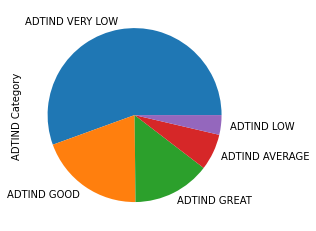

In [14]:
ppln['ADTIND'].max()
bins = [-1,5,15,30,40,54]
labels = ['ADTIND VERY LOW','ADTIND LOW','ADTIND AVERAGE','ADTIND GOOD','ADTIND GREAT']
ppln['ADTIND Category'] = pd.cut(ppln['ADTIND'],bins,labels = labels)
print(ppln['ADTIND Category'].value_counts())
ppln['ADTIND Category'].value_counts().plot(kind = 'pie')
ppln = ppln.drop(['ADTIND'],axis=1)
ppln.head(10)

ADTOCC VERY LOW    115398
ADTOCC AVERAGE      36063
ADTOCC GOOD         26631
ADTOCC LOW          14739
ADTOCC GREAT         6692
Name: ADTOCC Category, dtype: int64


,ACLSWKR,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,...,VETYN,YEAR,Age Category,AHRSPAY Category,CAPGAINS Category,CAPLOSS Category,DIVVAL Category,Weeks Worked Category,ADTIND Category,ADTOCC Category
0,Not in universe,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,2,95,AAGE senior citizen,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,...,2,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC GOOD
2,Not in universe,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,...,2,95,AAGE teenager,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW
3,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,0,94,AAGE child,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW
4,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,0,94,AAGE child,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW
5,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,...,2,95,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC LOW
6,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,...,2,94,AAGE adult,AHRSPAY BPL,CAPGAIN AVERAGE GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC VERY LOW
7,Private,High school graduate,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,Female,Not in universe,...,2,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK AVERAGE,ADTIND VERY LOW,ADTOCC GOOD
8,Local government,Some college but no degree,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,White,All other,Female,No,...,2,95,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND GREAT,ADTOCC AVERAGE
9,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,White,All other,Male,Not in universe,...,2,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC GOOD


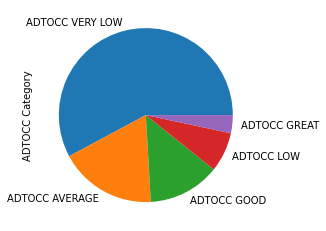

In [15]:
ppln['ADTOCC']
bins = [-1,5,15,30,40,54]
labels = ['ADTOCC VERY LOW','ADTOCC LOW','ADTOCC AVERAGE','ADTOCC GOOD','ADTOCC GREAT']
ppln['ADTOCC Category'] = pd.cut(ppln['ADTOCC'],bins,labels = labels)
print(ppln['ADTOCC Category'].value_counts())
ppln['ADTOCC Category'].value_counts().plot(kind = 'pie')
ppln = ppln.drop(['ADTOCC'],axis=1)
ppln.head(10)

NOEMP VERY LOW    119092
NOEMP GREAT        36511
NOEMP GOOD         20414
NOEMP AVERAGE      13425
NOEMP LOW          10081
Name: NOEMP Category, dtype: int64


,ACLSWKR,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,...,YEAR,Age Category,AHRSPAY Category,CAPGAINS Category,CAPLOSS Category,DIVVAL Category,Weeks Worked Category,ADTIND Category,ADTOCC Category,NOEMP Category
0,Not in universe,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,95,AAGE senior citizen,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,...,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC GOOD,NOEMP VERY LOW
2,Not in universe,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,...,95,AAGE teenager,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW
3,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,94,AAGE child,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW
4,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,94,AAGE child,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW
5,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,...,95,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC LOW,NOEMP VERY LOW
6,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,...,94,AAGE adult,AHRSPAY BPL,CAPGAIN AVERAGE GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC VERY LOW,NOEMP GREAT
7,Private,High school graduate,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,Female,Not in universe,...,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK AVERAGE,ADTIND VERY LOW,ADTOCC GOOD,NOEMP GOOD
8,Local government,Some college but no degree,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,White,All other,Female,No,...,95,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND GREAT,ADTOCC AVERAGE,NOEMP GOOD
9,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,White,All other,Male,Not in universe,...,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC GOOD,NOEMP GREAT


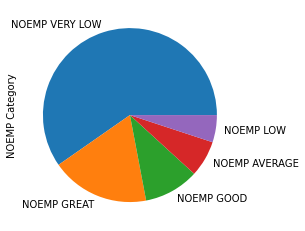

In [16]:
ppln['NOEMP'].unique()
bins = [-1,1,2,3,5,7]
labels = ['NOEMP VERY LOW','NOEMP LOW','NOEMP AVERAGE','NOEMP GOOD','NOEMP GREAT']
ppln['NOEMP Category'] = pd.cut(ppln['NOEMP'],bins,labels = labels)
print(ppln['NOEMP Category'].value_counts())
ppln['NOEMP Category'].value_counts().plot(kind = 'pie')
ppln = ppln.drop(['NOEMP'],axis=1)
ppln.head(10)

SEOTR LOW       180672
SEOTR HIGH       16153
SEOTR MEDIUM      2698
Name: SEOTR Category, dtype: int64


,ACLSWKR,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,...,Age Category,AHRSPAY Category,CAPGAINS Category,CAPLOSS Category,DIVVAL Category,Weeks Worked Category,ADTIND Category,ADTOCC Category,NOEMP Category,SEOTR Category
0,Not in universe,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,AAGE senior citizen,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW,SEOTR LOW
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,...,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC GOOD,NOEMP VERY LOW,SEOTR LOW
2,Not in universe,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,...,AAGE teenager,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW,SEOTR LOW
3,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,AAGE child,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW,SEOTR LOW
4,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,AAGE child,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW,SEOTR LOW
5,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,...,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC LOW,NOEMP VERY LOW,SEOTR HIGH
6,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,...,AAGE adult,AHRSPAY BPL,CAPGAIN AVERAGE GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC VERY LOW,NOEMP GREAT,SEOTR LOW
7,Private,High school graduate,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,Female,Not in universe,...,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK AVERAGE,ADTIND VERY LOW,ADTOCC GOOD,NOEMP GOOD,SEOTR LOW
8,Local government,Some college but no degree,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,White,All other,Female,No,...,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND GREAT,ADTOCC AVERAGE,NOEMP GOOD,SEOTR LOW
9,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,White,All other,Male,Not in universe,...,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC GOOD,NOEMP GREAT,SEOTR LOW


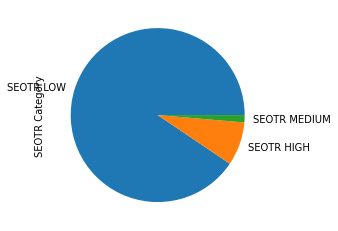

In [17]:
ppln['SEOTR']
bins = [-1,0.9,1.9,10]
labels = ['SEOTR LOW','SEOTR MEDIUM','SEOTR HIGH']
ppln['SEOTR Category'] = pd.cut(ppln['SEOTR'],bins,labels = labels)
print(ppln['SEOTR Category'].value_counts())
ppln['SEOTR Category'].value_counts().plot(kind = 'pie')
ppln = ppln.drop(['SEOTR'],axis=1)
ppln.head(10)

VETYN HIGH      150130
VETYN LOW        47409
VETYN MEDIUM      1984
Name: VETYN Category, dtype: int64


,ACLSWKR,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,...,AHRSPAY Category,CAPGAINS Category,CAPLOSS Category,DIVVAL Category,Weeks Worked Category,ADTIND Category,ADTOCC Category,NOEMP Category,SEOTR Category,VETYN Category
0,Not in universe,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW,SEOTR LOW,VETYN HIGH
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,...,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC GOOD,NOEMP VERY LOW,SEOTR LOW,VETYN HIGH
2,Not in universe,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,...,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW,SEOTR LOW,VETYN HIGH
3,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW,SEOTR LOW,VETYN LOW
4,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW,SEOTR LOW,VETYN LOW
5,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,...,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC LOW,NOEMP VERY LOW,SEOTR HIGH,VETYN HIGH
6,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,...,AHRSPAY BPL,CAPGAIN AVERAGE GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC VERY LOW,NOEMP GREAT,SEOTR LOW,VETYN HIGH
7,Private,High school graduate,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,Female,Not in universe,...,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK AVERAGE,ADTIND VERY LOW,ADTOCC GOOD,NOEMP GOOD,SEOTR LOW,VETYN HIGH
8,Local government,Some college but no degree,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,White,All other,Female,No,...,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND GREAT,ADTOCC AVERAGE,NOEMP GOOD,SEOTR LOW,VETYN HIGH
9,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,White,All other,Male,Not in universe,...,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC GOOD,NOEMP GREAT,SEOTR LOW,VETYN HIGH


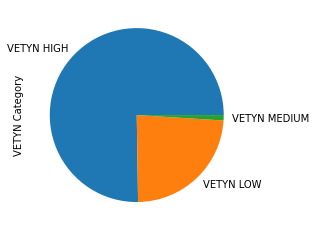

In [18]:
ppln['VETYN'].max()
bins = [-1,0.9,1.9,10]
labels = ['VETYN LOW','VETYN MEDIUM','VETYN HIGH']
ppln['VETYN Category'] = pd.cut(ppln['VETYN'],bins,labels = labels)
print(ppln['VETYN Category'].value_counts())
ppln['VETYN Category'].value_counts().plot(kind = 'pie')
ppln = ppln.drop(['VETYN'],axis=1)
ppln.head(10)

YEAR LOW     99827
YEAR HIGH    99696
Name: YEAR Category, dtype: int64


,ACLSWKR,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,...,CAPGAINS Category,CAPLOSS Category,DIVVAL Category,Weeks Worked Category,ADTIND Category,ADTOCC Category,NOEMP Category,SEOTR Category,VETYN Category,YEAR Category
0,Not in universe,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW,SEOTR LOW,VETYN HIGH,YEAR HIGH
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC GOOD,NOEMP VERY LOW,SEOTR LOW,VETYN HIGH,YEAR LOW
2,Not in universe,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW,SEOTR LOW,VETYN HIGH,YEAR HIGH
3,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW,SEOTR LOW,VETYN LOW,YEAR LOW
4,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW,SEOTR LOW,VETYN LOW,YEAR LOW
5,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC LOW,NOEMP VERY LOW,SEOTR HIGH,VETYN HIGH,YEAR HIGH
6,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,...,CAPGAIN AVERAGE GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC VERY LOW,NOEMP GREAT,SEOTR LOW,VETYN HIGH,YEAR LOW
7,Private,High school graduate,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,Female,Not in universe,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK AVERAGE,ADTIND VERY LOW,ADTOCC GOOD,NOEMP GOOD,SEOTR LOW,VETYN HIGH,YEAR HIGH
8,Local government,Some college but no degree,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,White,All other,Female,No,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND GREAT,ADTOCC AVERAGE,NOEMP GOOD,SEOTR LOW,VETYN HIGH,YEAR HIGH
9,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,White,All other,Male,Not in universe,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC GOOD,NOEMP GREAT,SEOTR LOW,VETYN HIGH,YEAR LOW


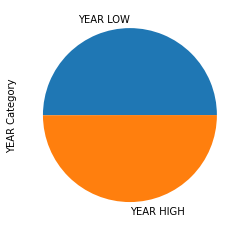

In [19]:
ppln['YEAR'].min()
bins = [90,94,100]
labels = ['YEAR LOW','YEAR HIGH']
ppln['YEAR Category'] = pd.cut(ppln['YEAR'],bins,labels = labels)
print(ppln['YEAR Category'].value_counts())
ppln['YEAR Category'].value_counts().plot(kind = 'pie')
ppln = ppln.drop(['YEAR'],axis=1)
ppln.head(10)

In [20]:
ppln.head(10)

,ACLSWKR,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,...,CAPGAINS Category,CAPLOSS Category,DIVVAL Category,Weeks Worked Category,ADTIND Category,ADTOCC Category,NOEMP Category,SEOTR Category,VETYN Category,YEAR Category
0,Not in universe,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW,SEOTR LOW,VETYN HIGH,YEAR HIGH
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC GOOD,NOEMP VERY LOW,SEOTR LOW,VETYN HIGH,YEAR LOW
2,Not in universe,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW,SEOTR LOW,VETYN HIGH,YEAR HIGH
3,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW,SEOTR LOW,VETYN LOW,YEAR LOW
4,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK VERY LOW,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW,SEOTR LOW,VETYN LOW,YEAR LOW
5,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC LOW,NOEMP VERY LOW,SEOTR HIGH,VETYN HIGH,YEAR HIGH
6,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,...,CAPGAIN AVERAGE GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC VERY LOW,NOEMP GREAT,SEOTR LOW,VETYN HIGH,YEAR LOW
7,Private,High school graduate,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,Female,Not in universe,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK AVERAGE,ADTIND VERY LOW,ADTOCC GOOD,NOEMP GOOD,SEOTR LOW,VETYN HIGH,YEAR HIGH
8,Local government,Some college but no degree,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,White,All other,Female,No,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND GREAT,ADTOCC AVERAGE,NOEMP GOOD,SEOTR LOW,VETYN HIGH,YEAR HIGH
9,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,White,All other,Male,Not in universe,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC GOOD,NOEMP GREAT,SEOTR LOW,VETYN HIGH,YEAR LOW


In [21]:
#ONE HOT ENCODING
column=[]
for i in ppln:
    column.append(i)
print(len(column))
print(column)
ohe = OneHotEncoder()
feat_array = ohe.fit_transform(ppln[column]).toarray()
print(feat_array)
feat_labels = ohe.categories_
feat_labels = np.hstack(feat_labels) 
# feat_labels = np.array(feat_labels).ravel()
# print(feat_labels)
new_feat1 = pd.DataFrame(feat_array,columns = feat_labels)
print(new_feat1.shape)
new_ppln = pd.concat([ppln,new_feat1],axis = 1)
new_ppln.head(10)

36
['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'VETQVA', 'Age Category', 'AHRSPAY Category', 'CAPGAINS Category', 'CAPLOSS Category', 'DIVVAL Category', 'Weeks Worked Category', 'ADTIND Category', 'ADTOCC Category', 'NOEMP Category', 'SEOTR Category', 'VETYN Category', 'YEAR Category']
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(199523, 414)


,ACLSWKR,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,...,NOEMP LOW,NOEMP VERY LOW,SEOTR HIGH,SEOTR LOW,SEOTR MEDIUM,VETYN HIGH,VETYN LOW,VETYN MEDIUM,YEAR HIGH,YEAR LOW
0,Not in universe,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,Not in universe,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7,Private,High school graduate,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,Female,Not in universe,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8,Local government,Some college but no degree,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,White,All other,Female,No,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
9,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,White,All other,Male,Not in universe,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [22]:
pp1 = PCA(n_components=50)
red_ppln =pp1.fit_transform(new_feat1)  #reduce the dimension to 20 for faster running code

/Users/vaibhavwali/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [23]:
kv=[]
lv=[]
for i in range(10,25):
    kv.append(i)
    kmed=ut.KMedians(n_clusters=i)
    one_hot_pred = kmed.predict(np.array(red_ppln))
    loss,_=kmed.fit(np.asarray(red_ppln))
    lv.append(loss/i)  

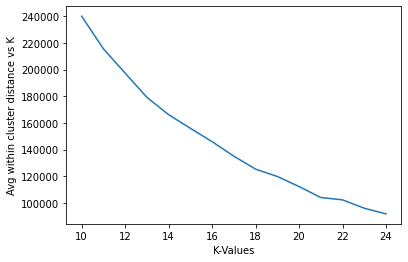

In [24]:
plt.xlabel("K-Values")
plt.ylabel("Avg within cluster distance vs K")
plt.plot(kv,lv)

In [25]:
#FOR More than 50k datset
print(mt5k.isnull().sum())
for i in mt5k:
    check=mt5k[i]
    mt5k[mt5k==' ?']=np.nan

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AHRSPAY     0
AHSCOL      0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
AREORGN     0
ASEX        0
AUNMEM      0
AUNTYPE     0
AWKSTAT     0
CAPGAIN     0
CAPLOSS     0
DIVVAL      0
FILESTAT    0
GRINREG     0
GRINST      0
HHDFMX      0
HHDREL      0
MIGMTR1     0
MIGMTR3     0
MIGMTR4     0
MIGSAME     0
MIGSUN      0
NOEMP       0
PARENT      0
PEFNTVTY    0
PEMNTVTY    0
PENATVTY    0
PRCITSHP    0
SEOTR       0
VETQVA      0
VETYN       0
WKSWORK     0
YEAR        0
dtype: int64


In [26]:
print(mt5k.isnull().sum())
print(mt5k.shape)
ptgs=[]
print("----------------------")
for i in mt5k:
    count=mt5k[i].isnull().sum()
    ptgs.append((i,count/len(mt5k)))
    
    if(ptgs[-1][1]>0.3):
        mt5k=mt5k.drop(i,axis=1)
        
print("Columns with more than 30% of missing data: ")
for i in ptgs:
    if(i[1]>0.3):
        print(i[0])
print ("----------------------")
print("Remaining columns: ")
print(mt5k.isnull().sum())
print(mt5k.shape)

AAGE           0
ACLSWKR        0
ADTIND         0
ADTOCC         0
AHGA           0
AHRSPAY        0
AHSCOL         0
AMARITL        0
AMJIND         0
AMJOCC         0
ARACE          0
AREORGN        0
ASEX           0
AUNMEM         0
AUNTYPE        0
AWKSTAT        0
CAPGAIN        0
CAPLOSS        0
DIVVAL         0
FILESTAT       0
GRINREG        0
GRINST        14
HHDFMX         0
HHDREL         0
MIGMTR1     1906
MIGMTR3     1906
MIGMTR4     1906
MIGSAME        0
MIGSUN      1906
NOEMP          0
PARENT         0
PEFNTVTY     162
PEMNTVTY     134
PENATVTY      93
PRCITSHP       0
SEOTR          0
VETQVA         0
VETYN          0
WKSWORK        0
YEAR           0
dtype: int64
(3580, 40)
----------------------
Columns with more than 30% of missing data: 
MIGMTR1
MIGMTR3
MIGMTR4
MIGSUN
----------------------
Remaining columns: 
AAGE          0
ACLSWKR       0
ADTIND        0
ADTOCC        0
AHGA          0
AHRSPAY       0
AHSCOL        0
AMARITL       0
AMJIND        0
AMJOCC    

In [27]:
for column in mt5k.columns:
    mt5k[column].fillna(mt5k[column].mode()[0], inplace=True)
print(mt5k.isnull().sum())

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AHRSPAY     0
AHSCOL      0
AMARITL     0
AMJIND      0
AMJOCC      0
ARACE       0
AREORGN     0
ASEX        0
AUNMEM      0
AUNTYPE     0
AWKSTAT     0
CAPGAIN     0
CAPLOSS     0
DIVVAL      0
FILESTAT    0
GRINREG     0
GRINST      0
HHDFMX      0
HHDREL      0
MIGSAME     0
NOEMP       0
PARENT      0
PEFNTVTY    0
PEMNTVTY    0
PENATVTY    0
PRCITSHP    0
SEOTR       0
VETQVA      0
VETYN       0
WKSWORK     0
YEAR        0
dtype: int64


AAGE adult             3164
AAGE senior citizen     413
AAGE teenager             3
AAGE infant               0
AAGE toddler              0
AAGE child                0
Name: Age Category, dtype: int64


,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,...,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,Age Category
0,Self-employed-incorporated,11,2,High school graduate,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,AAGE adult
1,Private,3,38,High school graduate,0,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,White,...,United-States,United-States,United-States,Native- Born in the United States,0,No,1,48,94,AAGE adult
2,Private,19,26,High school graduate,1550,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,White,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,AAGE adult
3,Private,33,2,9th grade,0,Not in universe,Never married,Retail trade,Executive admin and managerial,White,...,United-States,United-States,United-States,Native- Born in the United States,1,Not in universe,2,52,95,AAGE adult
4,Private,11,5,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,White,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,AAGE adult
5,Private,42,2,Some college but no degree,0,Not in universe,Married-civilian spouse present,Medical except hospital,Executive admin and managerial,White,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,40,94,AAGE adult
6,Self-employed-incorporated,34,2,Doctorate degree(PhD EdD),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,Asian or Pacific Islander,...,South Korea,South Korea,South Korea,Foreign born- U S citizen by naturalization,1,Not in universe,2,52,95,AAGE senior citizen
7,Self-employed-not incorporated,4,2,12th grade no diploma,0,Not in universe,Married-civilian spouse present,Construction,Executive admin and managerial,White,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,AAGE adult
8,Self-employed-incorporated,37,2,Some college but no degree,0,Not in universe,Never married,Business and repair services,Executive admin and managerial,White,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,AAGE adult
9,Private,35,16,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Sales,White,...,United-States,Scotland,United-States,Native- Born in the United States,0,Not in universe,2,52,95,AAGE adult


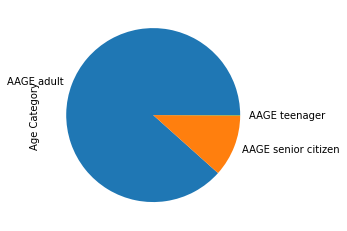

In [28]:
bins = [0,3,5,13,19,60,100]
labels = ['AAGE infant','AAGE toddler','AAGE child','AAGE teenager','AAGE adult','AAGE senior citizen']
mt5k['Age Category'] = pd.cut(mt5k['AAGE'],bins,labels = labels)
print(mt5k['Age Category'].value_counts())
mt5k['Age Category'].value_counts().plot(kind = 'pie')
mt5k = mt5k.drop(['AAGE'],axis=1)
mt5k.head(10)

AHRSPAY BPL             3431
AHRSPAY AVERAGE WAGE      92
AHRSPAY GOOD WAGE         47
AHRSPAY GREAT WAGE         9
AHRSPAY BAD WAGE           1
Name: AHRSPAY Category, dtype: int64


,ACLSWKR,ADTIND,ADTOCC,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,...,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,Age Category,AHRSPAY Category
0,Self-employed-incorporated,11,2,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,AAGE adult,AHRSPAY BPL
1,Private,3,38,High school graduate,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,White,All other,...,United-States,United-States,Native- Born in the United States,0,No,1,48,94,AAGE adult,AHRSPAY BPL
2,Private,19,26,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,White,All other,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,AAGE adult,AHRSPAY AVERAGE WAGE
3,Private,33,2,9th grade,Not in universe,Never married,Retail trade,Executive admin and managerial,White,All other,...,United-States,United-States,Native- Born in the United States,1,Not in universe,2,52,95,AAGE adult,AHRSPAY BPL
4,Private,11,5,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,White,All other,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,AAGE adult,AHRSPAY BPL
5,Private,42,2,Some college but no degree,Not in universe,Married-civilian spouse present,Medical except hospital,Executive admin and managerial,White,All other,...,United-States,United-States,Native- Born in the United States,2,Not in universe,2,40,94,AAGE adult,AHRSPAY BPL
6,Self-employed-incorporated,34,2,Doctorate degree(PhD EdD),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,Asian or Pacific Islander,All other,...,South Korea,South Korea,Foreign born- U S citizen by naturalization,1,Not in universe,2,52,95,AAGE senior citizen,AHRSPAY BPL
7,Self-employed-not incorporated,4,2,12th grade no diploma,Not in universe,Married-civilian spouse present,Construction,Executive admin and managerial,White,All other,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,AAGE adult,AHRSPAY BPL
8,Self-employed-incorporated,37,2,Some college but no degree,Not in universe,Never married,Business and repair services,Executive admin and managerial,White,All other,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,AAGE adult,AHRSPAY BPL
9,Private,35,16,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Sales,White,All other,...,Scotland,United-States,Native- Born in the United States,0,Not in universe,2,52,95,AAGE adult,AHRSPAY BPL


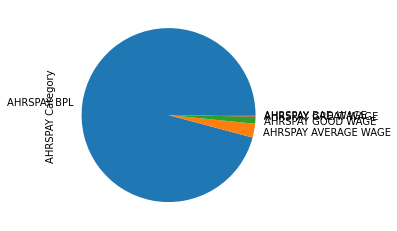

In [29]:
bins = [-1,300,400,2000,3000,10000]
labels = ['AHRSPAY BPL','AHRSPAY BAD WAGE','AHRSPAY AVERAGE WAGE','AHRSPAY GOOD WAGE','AHRSPAY GREAT WAGE']
mt5k['AHRSPAY Category'] = pd.cut(mt5k['AHRSPAY'],bins,labels = labels)
print(mt5k['AHRSPAY Category'].value_counts())
mt5k['AHRSPAY Category'].value_counts().plot(kind = 'pie')
mt5k = mt5k.drop(['AHRSPAY'],axis=1)
mt5k.head(10)

CAPGAIN VERY LOW GAINS    2902
CAPGAIN GOOD GAINS         350
CAPGAIN AVERAGE GAINS      235
CAPGAIN GREAT GAINS         93
CAPGAIN LOW GAINS            0
Name: CAPGAINS Category, dtype: int64


,ACLSWKR,ADTIND,ADTOCC,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,...,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,Age Category,AHRSPAY Category,CAPGAINS Category
0,Self-employed-incorporated,11,2,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,...,United-States,Native- Born in the United States,0,Not in universe,2,52,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS
1,Private,3,38,High school graduate,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,White,All other,...,United-States,Native- Born in the United States,0,No,1,48,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS
2,Private,19,26,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,White,All other,...,United-States,Native- Born in the United States,0,Not in universe,2,52,94,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS
3,Private,33,2,9th grade,Not in universe,Never married,Retail trade,Executive admin and managerial,White,All other,...,United-States,Native- Born in the United States,1,Not in universe,2,52,95,AAGE adult,AHRSPAY BPL,CAPGAIN GOOD GAINS
4,Private,11,5,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,White,All other,...,United-States,Native- Born in the United States,0,Not in universe,2,52,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS
5,Private,42,2,Some college but no degree,Not in universe,Married-civilian spouse present,Medical except hospital,Executive admin and managerial,White,All other,...,United-States,Native- Born in the United States,2,Not in universe,2,40,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS
6,Self-employed-incorporated,34,2,Doctorate degree(PhD EdD),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,Asian or Pacific Islander,All other,...,South Korea,Foreign born- U S citizen by naturalization,1,Not in universe,2,52,95,AAGE senior citizen,AHRSPAY BPL,CAPGAIN GREAT GAINS
7,Self-employed-not incorporated,4,2,12th grade no diploma,Not in universe,Married-civilian spouse present,Construction,Executive admin and managerial,White,All other,...,United-States,Native- Born in the United States,0,Not in universe,2,52,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS
8,Self-employed-incorporated,37,2,Some college but no degree,Not in universe,Never married,Business and repair services,Executive admin and managerial,White,All other,...,United-States,Native- Born in the United States,0,Not in universe,2,52,95,AAGE adult,AHRSPAY BPL,CAPGAIN GOOD GAINS
9,Private,35,16,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Sales,White,All other,...,United-States,Native- Born in the United States,0,Not in universe,2,52,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS


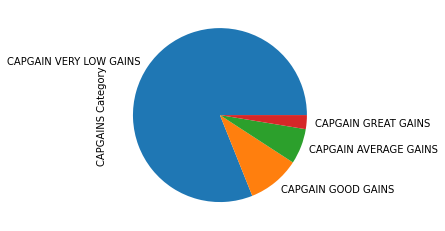

In [30]:
bins = [-1,1000,2000,10000,50000,100000]
labels = ['CAPGAIN VERY LOW GAINS','CAPGAIN LOW GAINS','CAPGAIN AVERAGE GAINS','CAPGAIN GOOD GAINS','CAPGAIN GREAT GAINS']
mt5k['CAPGAINS Category'] = pd.cut(mt5k['CAPGAIN'],bins,labels = labels)
print(mt5k['CAPGAINS Category'].value_counts())
mt5k['CAPGAINS Category'].value_counts().plot(kind = 'pie')
mt5k = mt5k.drop(columns=['CAPGAIN'],axis=1)
mt5k.head(10)

CAPLOSS VERY LOW CAPLOSS    3243
CAPLOSS AVERAGE CAPLOSS      229
CAPLOSS GOOD CAPLOSS         102
CAPLOSS LOW CAPLOSS            3
CAPLOSS GREAT CAPLOSS          3
Name: CAPLOSS Category, dtype: int64


,ACLSWKR,ADTIND,ADTOCC,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,...,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,Age Category,AHRSPAY Category,CAPGAINS Category,CAPLOSS Category
0,Self-employed-incorporated,11,2,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,...,Native- Born in the United States,0,Not in universe,2,52,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS
1,Private,3,38,High school graduate,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,White,All other,...,Native- Born in the United States,0,No,1,48,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS
2,Private,19,26,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,White,All other,...,Native- Born in the United States,0,Not in universe,2,52,94,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS
3,Private,33,2,9th grade,Not in universe,Never married,Retail trade,Executive admin and managerial,White,All other,...,Native- Born in the United States,1,Not in universe,2,52,95,AAGE adult,AHRSPAY BPL,CAPGAIN GOOD GAINS,CAPLOSS VERY LOW CAPLOSS
4,Private,11,5,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,White,All other,...,Native- Born in the United States,0,Not in universe,2,52,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS
5,Private,42,2,Some college but no degree,Not in universe,Married-civilian spouse present,Medical except hospital,Executive admin and managerial,White,All other,...,Native- Born in the United States,2,Not in universe,2,40,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS
6,Self-employed-incorporated,34,2,Doctorate degree(PhD EdD),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,Asian or Pacific Islander,All other,...,Foreign born- U S citizen by naturalization,1,Not in universe,2,52,95,AAGE senior citizen,AHRSPAY BPL,CAPGAIN GREAT GAINS,CAPLOSS VERY LOW CAPLOSS
7,Self-employed-not incorporated,4,2,12th grade no diploma,Not in universe,Married-civilian spouse present,Construction,Executive admin and managerial,White,All other,...,Native- Born in the United States,0,Not in universe,2,52,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS
8,Self-employed-incorporated,37,2,Some college but no degree,Not in universe,Never married,Business and repair services,Executive admin and managerial,White,All other,...,Native- Born in the United States,0,Not in universe,2,52,95,AAGE adult,AHRSPAY BPL,CAPGAIN GOOD GAINS,CAPLOSS VERY LOW CAPLOSS
9,Private,35,16,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Sales,White,All other,...,Native- Born in the United States,0,Not in universe,2,52,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS


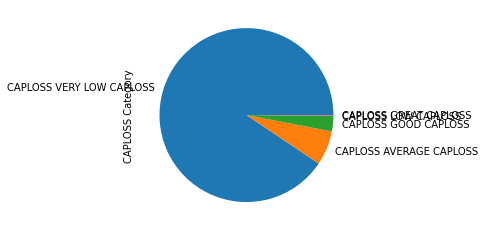

In [31]:
bins = [-1,30,500,2000,3000,5000]
labels = ['CAPLOSS VERY LOW CAPLOSS','CAPLOSS LOW CAPLOSS','CAPLOSS AVERAGE CAPLOSS','CAPLOSS GOOD CAPLOSS','CAPLOSS GREAT CAPLOSS']
mt5k['CAPLOSS Category'] = pd.cut(mt5k['CAPLOSS'],bins,labels = labels)
print(mt5k['CAPLOSS Category'].value_counts())
mt5k['CAPLOSS Category'].value_counts().plot(kind = 'pie')
mt5k = mt5k.drop(['CAPLOSS'],axis=1)
mt5k.head(10)

DIVVAL VERY LOW    2374
DIVVAL AVERAGE      553
DIVVAL LOW          435
DIVVAL GOOD         177
DIVVAL GREAT         41
Name: DIVVAL Category, dtype: int64


,ACLSWKR,ADTIND,ADTOCC,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,...,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,Age Category,AHRSPAY Category,CAPGAINS Category,CAPLOSS Category,DIVVAL Category
0,Self-employed-incorporated,11,2,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,...,0,Not in universe,2,52,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW
1,Private,3,38,High school graduate,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,White,All other,...,0,No,1,48,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW
2,Private,19,26,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,White,All other,...,0,Not in universe,2,52,94,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW
3,Private,33,2,9th grade,Not in universe,Never married,Retail trade,Executive admin and managerial,White,All other,...,1,Not in universe,2,52,95,AAGE adult,AHRSPAY BPL,CAPGAIN GOOD GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW
4,Private,11,5,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,White,All other,...,0,Not in universe,2,52,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW
5,Private,42,2,Some college but no degree,Not in universe,Married-civilian spouse present,Medical except hospital,Executive admin and managerial,White,All other,...,2,Not in universe,2,40,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW
6,Self-employed-incorporated,34,2,Doctorate degree(PhD EdD),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,Asian or Pacific Islander,All other,...,1,Not in universe,2,52,95,AAGE senior citizen,AHRSPAY BPL,CAPGAIN GREAT GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL AVERAGE
7,Self-employed-not incorporated,4,2,12th grade no diploma,Not in universe,Married-civilian spouse present,Construction,Executive admin and managerial,White,All other,...,0,Not in universe,2,52,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW
8,Self-employed-incorporated,37,2,Some college but no degree,Not in universe,Never married,Business and repair services,Executive admin and managerial,White,All other,...,0,Not in universe,2,52,95,AAGE adult,AHRSPAY BPL,CAPGAIN GOOD GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW
9,Private,35,16,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Sales,White,All other,...,0,Not in universe,2,52,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL GOOD


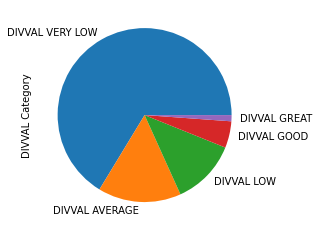

In [32]:
bins = [-1,100,500,5000,30000,100000]
labels = ['DIVVAL VERY LOW','DIVVAL LOW','DIVVAL AVERAGE','DIVVAL GOOD','DIVVAL GREAT']
mt5k['DIVVAL Category'] = pd.cut(mt5k['DIVVAL'],bins,labels = labels)
print(mt5k['DIVVAL Category'].value_counts())
mt5k['DIVVAL Category'].value_counts().plot(kind = 'pie')
mt5k = mt5k.drop(['DIVVAL'],axis=1)
mt5k.head(10)

WKSWORK GREAT       3194
WKSWORK VERY LOW     199
WKSWORK GOOD          97
WKSWORK AVERAGE       64
WKSWORK LOW           26
Name: Weeks Worked Category, dtype: int64


,ACLSWKR,ADTIND,ADTOCC,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,...,SEOTR,VETQVA,VETYN,YEAR,Age Category,AHRSPAY Category,CAPGAINS Category,CAPLOSS Category,DIVVAL Category,Weeks Worked Category
0,Self-employed-incorporated,11,2,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,...,0,Not in universe,2,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW,WKSWORK GREAT
1,Private,3,38,High school graduate,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,White,All other,...,0,No,1,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT
2,Private,19,26,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,White,All other,...,0,Not in universe,2,94,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT
3,Private,33,2,9th grade,Not in universe,Never married,Retail trade,Executive admin and managerial,White,All other,...,1,Not in universe,2,95,AAGE adult,AHRSPAY BPL,CAPGAIN GOOD GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW,WKSWORK GREAT
4,Private,11,5,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,White,All other,...,0,Not in universe,2,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT
5,Private,42,2,Some college but no degree,Not in universe,Married-civilian spouse present,Medical except hospital,Executive admin and managerial,White,All other,...,2,Not in universe,2,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GOOD
6,Self-employed-incorporated,34,2,Doctorate degree(PhD EdD),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,Asian or Pacific Islander,All other,...,1,Not in universe,2,95,AAGE senior citizen,AHRSPAY BPL,CAPGAIN GREAT GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL AVERAGE,WKSWORK GREAT
7,Self-employed-not incorporated,4,2,12th grade no diploma,Not in universe,Married-civilian spouse present,Construction,Executive admin and managerial,White,All other,...,0,Not in universe,2,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT
8,Self-employed-incorporated,37,2,Some college but no degree,Not in universe,Never married,Business and repair services,Executive admin and managerial,White,All other,...,0,Not in universe,2,95,AAGE adult,AHRSPAY BPL,CAPGAIN GOOD GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW,WKSWORK GREAT
9,Private,35,16,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Sales,White,All other,...,0,Not in universe,2,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL GOOD,WKSWORK GREAT


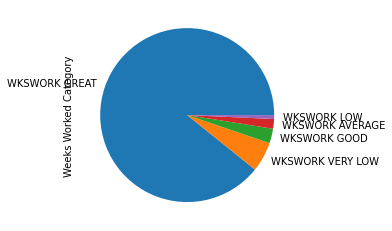

In [33]:
bins = [-1,10,20,30,40,54]
labels = ['WKSWORK VERY LOW','WKSWORK LOW','WKSWORK AVERAGE','WKSWORK GOOD','WKSWORK GREAT']
mt5k['Weeks Worked Category'] = pd.cut(mt5k['WKSWORK'],bins,labels = labels)
print(mt5k['Weeks Worked Category'].value_counts())
mt5k['Weeks Worked Category'].value_counts().plot(kind = 'pie')
mt5k = mt5k.drop(['WKSWORK'],axis=1)
mt5k.head(10)

ADTIND GREAT       1199
ADTIND GOOD         994
ADTIND VERY LOW     542
ADTIND AVERAGE      493
ADTIND LOW          352
Name: ADTIND Category, dtype: int64


,ACLSWKR,ADTOCC,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,...,VETQVA,VETYN,YEAR,Age Category,AHRSPAY Category,CAPGAINS Category,CAPLOSS Category,DIVVAL Category,Weeks Worked Category,ADTIND Category
0,Self-employed-incorporated,2,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,Male,...,Not in universe,2,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW,WKSWORK GREAT,ADTIND LOW
1,Private,38,High school graduate,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,White,All other,Male,...,No,1,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW
2,Private,26,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,White,All other,Male,...,Not in universe,2,94,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND AVERAGE
3,Private,2,9th grade,Not in universe,Never married,Retail trade,Executive admin and managerial,White,All other,Male,...,Not in universe,2,95,AAGE adult,AHRSPAY BPL,CAPGAIN GOOD GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW,WKSWORK GREAT,ADTIND GOOD
4,Private,5,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,White,All other,Female,...,Not in universe,2,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND LOW
5,Private,2,Some college but no degree,Not in universe,Married-civilian spouse present,Medical except hospital,Executive admin and managerial,White,All other,Female,...,Not in universe,2,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GOOD,ADTIND GREAT
6,Self-employed-incorporated,2,Doctorate degree(PhD EdD),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,Asian or Pacific Islander,All other,Male,...,Not in universe,2,95,AAGE senior citizen,AHRSPAY BPL,CAPGAIN GREAT GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL AVERAGE,WKSWORK GREAT,ADTIND GOOD
7,Self-employed-not incorporated,2,12th grade no diploma,Not in universe,Married-civilian spouse present,Construction,Executive admin and managerial,White,All other,Male,...,Not in universe,2,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW
8,Self-employed-incorporated,2,Some college but no degree,Not in universe,Never married,Business and repair services,Executive admin and managerial,White,All other,Female,...,Not in universe,2,95,AAGE adult,AHRSPAY BPL,CAPGAIN GOOD GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW,WKSWORK GREAT,ADTIND GOOD
9,Private,16,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Sales,White,All other,Female,...,Not in universe,2,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL GOOD,WKSWORK GREAT,ADTIND GOOD


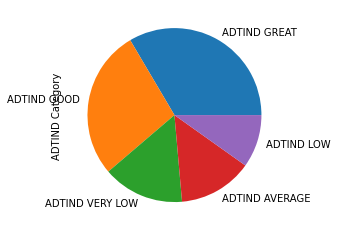

In [34]:
bins = [-1,5,15,30,40,54]
labels = ['ADTIND VERY LOW','ADTIND LOW','ADTIND AVERAGE','ADTIND GOOD','ADTIND GREAT']
mt5k['ADTIND Category'] = pd.cut(mt5k['ADTIND'],bins,labels = labels)
print(mt5k['ADTIND Category'].value_counts())
mt5k['ADTIND Category'].value_counts().plot(kind = 'pie')
mt5k = mt5k.drop(['ADTIND'],axis=1)
mt5k.head(10)

ADTOCC VERY LOW    1579
ADTOCC LOW          850
ADTOCC AVERAGE      644
ADTOCC GOOD         448
ADTOCC GREAT         59
Name: ADTOCC Category, dtype: int64


,ACLSWKR,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,...,VETYN,YEAR,Age Category,AHRSPAY Category,CAPGAINS Category,CAPLOSS Category,DIVVAL Category,Weeks Worked Category,ADTIND Category,ADTOCC Category
0,Self-employed-incorporated,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,Male,Not in universe,...,2,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW,WKSWORK GREAT,ADTIND LOW,ADTOCC VERY LOW
1,Private,High school graduate,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,White,All other,Male,Not in universe,...,1,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC GOOD
2,Private,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,White,All other,Male,Yes,...,2,94,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND AVERAGE,ADTOCC AVERAGE
3,Private,9th grade,Not in universe,Never married,Retail trade,Executive admin and managerial,White,All other,Male,Not in universe,...,2,95,AAGE adult,AHRSPAY BPL,CAPGAIN GOOD GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC VERY LOW
4,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,White,All other,Female,Not in universe,...,2,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND LOW,ADTOCC VERY LOW
5,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Medical except hospital,Executive admin and managerial,White,All other,Female,Not in universe,...,2,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GOOD,ADTIND GREAT,ADTOCC VERY LOW
6,Self-employed-incorporated,Doctorate degree(PhD EdD),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,Asian or Pacific Islander,All other,Male,Not in universe,...,2,95,AAGE senior citizen,AHRSPAY BPL,CAPGAIN GREAT GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL AVERAGE,WKSWORK GREAT,ADTIND GOOD,ADTOCC VERY LOW
7,Self-employed-not incorporated,12th grade no diploma,Not in universe,Married-civilian spouse present,Construction,Executive admin and managerial,White,All other,Male,Not in universe,...,2,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC VERY LOW
8,Self-employed-incorporated,Some college but no degree,Not in universe,Never married,Business and repair services,Executive admin and managerial,White,All other,Female,Not in universe,...,2,95,AAGE adult,AHRSPAY BPL,CAPGAIN GOOD GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC VERY LOW
9,Private,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Sales,White,All other,Female,No,...,2,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL GOOD,WKSWORK GREAT,ADTIND GOOD,ADTOCC AVERAGE


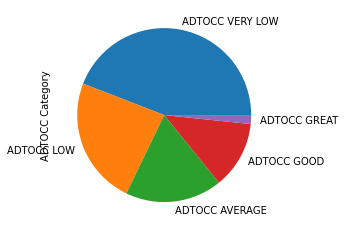

In [35]:
bins = [-1,5,15,30,40,54]
labels = ['ADTOCC VERY LOW','ADTOCC LOW','ADTOCC AVERAGE','ADTOCC GOOD','ADTOCC GREAT']
mt5k['ADTOCC Category'] = pd.cut(mt5k['ADTOCC'],bins,labels = labels)
print(mt5k['ADTOCC Category'].value_counts())
mt5k['ADTOCC Category'].value_counts().plot(kind = 'pie')
mt5k = mt5k.drop(['ADTOCC'],axis=1)
mt5k.head(10)

NOEMP GREAT       1601
NOEMP VERY LOW     769
NOEMP GOOD         625
NOEMP AVERAGE      353
NOEMP LOW          232
Name: NOEMP Category, dtype: int64


,ACLSWKR,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,...,YEAR,Age Category,AHRSPAY Category,CAPGAINS Category,CAPLOSS Category,DIVVAL Category,Weeks Worked Category,ADTIND Category,ADTOCC Category,NOEMP Category
0,Self-employed-incorporated,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,Male,Not in universe,...,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW,WKSWORK GREAT,ADTIND LOW,ADTOCC VERY LOW,NOEMP LOW
1,Private,High school graduate,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,White,All other,Male,Not in universe,...,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC GOOD,NOEMP GOOD
2,Private,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,White,All other,Male,Yes,...,94,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND AVERAGE,ADTOCC AVERAGE,NOEMP GREAT
3,Private,9th grade,Not in universe,Never married,Retail trade,Executive admin and managerial,White,All other,Male,Not in universe,...,95,AAGE adult,AHRSPAY BPL,CAPGAIN GOOD GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC VERY LOW,NOEMP LOW
4,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,White,All other,Female,Not in universe,...,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND LOW,ADTOCC VERY LOW,NOEMP GREAT
5,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Medical except hospital,Executive admin and managerial,White,All other,Female,Not in universe,...,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GOOD,ADTIND GREAT,ADTOCC VERY LOW,NOEMP AVERAGE
6,Self-employed-incorporated,Doctorate degree(PhD EdD),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,Asian or Pacific Islander,All other,Male,Not in universe,...,95,AAGE senior citizen,AHRSPAY BPL,CAPGAIN GREAT GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL AVERAGE,WKSWORK GREAT,ADTIND GOOD,ADTOCC VERY LOW,NOEMP AVERAGE
7,Self-employed-not incorporated,12th grade no diploma,Not in universe,Married-civilian spouse present,Construction,Executive admin and managerial,White,All other,Male,Not in universe,...,94,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW
8,Self-employed-incorporated,Some college but no degree,Not in universe,Never married,Business and repair services,Executive admin and managerial,White,All other,Female,Not in universe,...,95,AAGE adult,AHRSPAY BPL,CAPGAIN GOOD GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC VERY LOW,NOEMP AVERAGE
9,Private,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Sales,White,All other,Female,No,...,95,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL GOOD,WKSWORK GREAT,ADTIND GOOD,ADTOCC AVERAGE,NOEMP GREAT


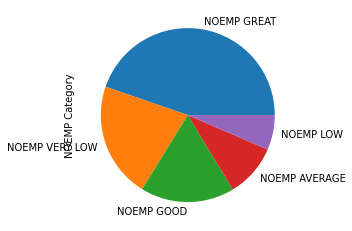

In [36]:
bins = [-1,1,2,3,5,7]
labels = ['NOEMP VERY LOW','NOEMP LOW','NOEMP AVERAGE','NOEMP GOOD','NOEMP GREAT']
mt5k['NOEMP Category'] = pd.cut(mt5k['NOEMP'],bins,labels = labels)
print(mt5k['NOEMP Category'].value_counts())
mt5k['NOEMP Category'].value_counts().plot(kind = 'pie')
mt5k = mt5k.drop(['NOEMP'],axis=1)
mt5k.head(10)

SEOTR LOW       3028
SEOTR HIGH       382
SEOTR MEDIUM     170
Name: SEOTR Category, dtype: int64


,ACLSWKR,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,...,Age Category,AHRSPAY Category,CAPGAINS Category,CAPLOSS Category,DIVVAL Category,Weeks Worked Category,ADTIND Category,ADTOCC Category,NOEMP Category,SEOTR Category
0,Self-employed-incorporated,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,Male,Not in universe,...,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW,WKSWORK GREAT,ADTIND LOW,ADTOCC VERY LOW,NOEMP LOW,SEOTR LOW
1,Private,High school graduate,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,White,All other,Male,Not in universe,...,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC GOOD,NOEMP GOOD,SEOTR LOW
2,Private,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,White,All other,Male,Yes,...,AAGE adult,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND AVERAGE,ADTOCC AVERAGE,NOEMP GREAT,SEOTR LOW
3,Private,9th grade,Not in universe,Never married,Retail trade,Executive admin and managerial,White,All other,Male,Not in universe,...,AAGE adult,AHRSPAY BPL,CAPGAIN GOOD GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC VERY LOW,NOEMP LOW,SEOTR MEDIUM
4,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,White,All other,Female,Not in universe,...,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND LOW,ADTOCC VERY LOW,NOEMP GREAT,SEOTR LOW
5,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Medical except hospital,Executive admin and managerial,White,All other,Female,Not in universe,...,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GOOD,ADTIND GREAT,ADTOCC VERY LOW,NOEMP AVERAGE,SEOTR HIGH
6,Self-employed-incorporated,Doctorate degree(PhD EdD),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,Asian or Pacific Islander,All other,Male,Not in universe,...,AAGE senior citizen,AHRSPAY BPL,CAPGAIN GREAT GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL AVERAGE,WKSWORK GREAT,ADTIND GOOD,ADTOCC VERY LOW,NOEMP AVERAGE,SEOTR MEDIUM
7,Self-employed-not incorporated,12th grade no diploma,Not in universe,Married-civilian spouse present,Construction,Executive admin and managerial,White,All other,Male,Not in universe,...,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW,SEOTR LOW
8,Self-employed-incorporated,Some college but no degree,Not in universe,Never married,Business and repair services,Executive admin and managerial,White,All other,Female,Not in universe,...,AAGE adult,AHRSPAY BPL,CAPGAIN GOOD GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC VERY LOW,NOEMP AVERAGE,SEOTR LOW
9,Private,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Sales,White,All other,Female,No,...,AAGE adult,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL GOOD,WKSWORK GREAT,ADTIND GOOD,ADTOCC AVERAGE,NOEMP GREAT,SEOTR LOW


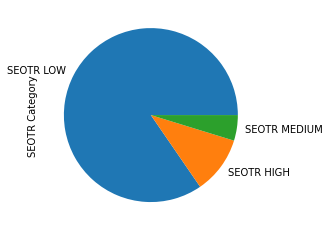

In [37]:
bins = [-1,0.9,1.9,10]
labels = ['SEOTR LOW','SEOTR MEDIUM','SEOTR HIGH']
mt5k['SEOTR Category'] = pd.cut(mt5k['SEOTR'],bins,labels = labels)
print(mt5k['SEOTR Category'].value_counts())
mt5k['SEOTR Category'].value_counts().plot(kind = 'pie')
mt5k = mt5k.drop(['SEOTR'],axis=1)
mt5k.head(10)

VETYN HIGH      3517
VETYN MEDIUM      63
VETYN LOW          0
Name: VETYN Category, dtype: int64


,ACLSWKR,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,...,AHRSPAY Category,CAPGAINS Category,CAPLOSS Category,DIVVAL Category,Weeks Worked Category,ADTIND Category,ADTOCC Category,NOEMP Category,SEOTR Category,VETYN Category
0,Self-employed-incorporated,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,Male,Not in universe,...,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW,WKSWORK GREAT,ADTIND LOW,ADTOCC VERY LOW,NOEMP LOW,SEOTR LOW,VETYN HIGH
1,Private,High school graduate,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,White,All other,Male,Not in universe,...,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC GOOD,NOEMP GOOD,SEOTR LOW,VETYN MEDIUM
2,Private,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,White,All other,Male,Yes,...,AHRSPAY AVERAGE WAGE,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND AVERAGE,ADTOCC AVERAGE,NOEMP GREAT,SEOTR LOW,VETYN HIGH
3,Private,9th grade,Not in universe,Never married,Retail trade,Executive admin and managerial,White,All other,Male,Not in universe,...,AHRSPAY BPL,CAPGAIN GOOD GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC VERY LOW,NOEMP LOW,SEOTR MEDIUM,VETYN HIGH
4,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,White,All other,Female,Not in universe,...,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND LOW,ADTOCC VERY LOW,NOEMP GREAT,SEOTR LOW,VETYN HIGH
5,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Medical except hospital,Executive admin and managerial,White,All other,Female,Not in universe,...,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GOOD,ADTIND GREAT,ADTOCC VERY LOW,NOEMP AVERAGE,SEOTR HIGH,VETYN HIGH
6,Self-employed-incorporated,Doctorate degree(PhD EdD),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,Asian or Pacific Islander,All other,Male,Not in universe,...,AHRSPAY BPL,CAPGAIN GREAT GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL AVERAGE,WKSWORK GREAT,ADTIND GOOD,ADTOCC VERY LOW,NOEMP AVERAGE,SEOTR MEDIUM,VETYN HIGH
7,Self-employed-not incorporated,12th grade no diploma,Not in universe,Married-civilian spouse present,Construction,Executive admin and managerial,White,All other,Male,Not in universe,...,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW,SEOTR LOW,VETYN HIGH
8,Self-employed-incorporated,Some college but no degree,Not in universe,Never married,Business and repair services,Executive admin and managerial,White,All other,Female,Not in universe,...,AHRSPAY BPL,CAPGAIN GOOD GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC VERY LOW,NOEMP AVERAGE,SEOTR LOW,VETYN HIGH
9,Private,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Sales,White,All other,Female,No,...,AHRSPAY BPL,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL GOOD,WKSWORK GREAT,ADTIND GOOD,ADTOCC AVERAGE,NOEMP GREAT,SEOTR LOW,VETYN HIGH


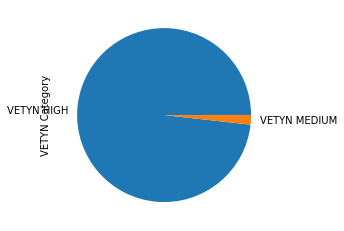

In [38]:
bins = [-1,0.9,1.9,10]
labels = ['VETYN LOW','VETYN MEDIUM','VETYN HIGH']
mt5k['VETYN Category'] = pd.cut(mt5k['VETYN'],bins,labels = labels)
print(mt5k['VETYN Category'].value_counts())
mt5k['VETYN Category'].value_counts().plot(kind = 'pie')
mt5k = mt5k.drop(['VETYN'],axis=1)
mt5k.head(10)

YEAR HIGH    1906
YEAR LOW     1674
Name: YEAR Category, dtype: int64


,ACLSWKR,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,...,CAPGAINS Category,CAPLOSS Category,DIVVAL Category,Weeks Worked Category,ADTIND Category,ADTOCC Category,NOEMP Category,SEOTR Category,VETYN Category,YEAR Category
0,Self-employed-incorporated,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,Male,Not in universe,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW,WKSWORK GREAT,ADTIND LOW,ADTOCC VERY LOW,NOEMP LOW,SEOTR LOW,VETYN HIGH,YEAR HIGH
1,Private,High school graduate,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,White,All other,Male,Not in universe,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC GOOD,NOEMP GOOD,SEOTR LOW,VETYN MEDIUM,YEAR LOW
2,Private,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,White,All other,Male,Yes,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND AVERAGE,ADTOCC AVERAGE,NOEMP GREAT,SEOTR LOW,VETYN HIGH,YEAR LOW
3,Private,9th grade,Not in universe,Never married,Retail trade,Executive admin and managerial,White,All other,Male,Not in universe,...,CAPGAIN GOOD GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC VERY LOW,NOEMP LOW,SEOTR MEDIUM,VETYN HIGH,YEAR HIGH
4,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,White,All other,Female,Not in universe,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND LOW,ADTOCC VERY LOW,NOEMP GREAT,SEOTR LOW,VETYN HIGH,YEAR HIGH
5,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Medical except hospital,Executive admin and managerial,White,All other,Female,Not in universe,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GOOD,ADTIND GREAT,ADTOCC VERY LOW,NOEMP AVERAGE,SEOTR HIGH,VETYN HIGH,YEAR LOW
6,Self-employed-incorporated,Doctorate degree(PhD EdD),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,Asian or Pacific Islander,All other,Male,Not in universe,...,CAPGAIN GREAT GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL AVERAGE,WKSWORK GREAT,ADTIND GOOD,ADTOCC VERY LOW,NOEMP AVERAGE,SEOTR MEDIUM,VETYN HIGH,YEAR HIGH
7,Self-employed-not incorporated,12th grade no diploma,Not in universe,Married-civilian spouse present,Construction,Executive admin and managerial,White,All other,Male,Not in universe,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL VERY LOW,WKSWORK GREAT,ADTIND VERY LOW,ADTOCC VERY LOW,NOEMP VERY LOW,SEOTR LOW,VETYN HIGH,YEAR LOW
8,Self-employed-incorporated,Some college but no degree,Not in universe,Never married,Business and repair services,Executive admin and managerial,White,All other,Female,Not in universe,...,CAPGAIN GOOD GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL LOW,WKSWORK GREAT,ADTIND GOOD,ADTOCC VERY LOW,NOEMP AVERAGE,SEOTR LOW,VETYN HIGH,YEAR HIGH
9,Private,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Sales,White,All other,Female,No,...,CAPGAIN VERY LOW GAINS,CAPLOSS VERY LOW CAPLOSS,DIVVAL GOOD,WKSWORK GREAT,ADTIND GOOD,ADTOCC AVERAGE,NOEMP GREAT,SEOTR LOW,VETYN HIGH,YEAR HIGH


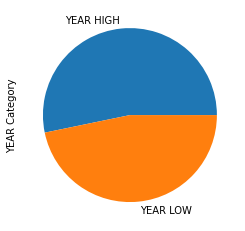

In [39]:
bins = [90,94,100]
labels = ['YEAR LOW','YEAR HIGH']
mt5k['YEAR Category'] = pd.cut(mt5k['YEAR'],bins,labels = labels)
print(mt5k['YEAR Category'].value_counts())
mt5k['YEAR Category'].value_counts().plot(kind = 'pie')
mt5k = mt5k.drop(['YEAR'],axis=1)
mt5k.head(10)

In [40]:
column=[]
for i in mt5k:
    column.append(i)
print(len(column))
print(column)
ohe = OneHotEncoder()
feat_array = ohe.fit_transform(mt5k[column]).toarray()
print(feat_array)
feat_labels = ohe.categories_
feat_labels = np.hstack(feat_labels) 
# feat_labels = np.array(feat_labels).ravel()
# print(feat_labels)
new_feat = pd.DataFrame(feat_array,columns = feat_labels)
new_mt5k = pd.concat([mt5k,new_feat],axis = 1)
new_mt5k.head(10)

36
['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'VETQVA', 'Age Category', 'AHRSPAY Category', 'CAPGAINS Category', 'CAPLOSS Category', 'DIVVAL Category', 'Weeks Worked Category', 'ADTIND Category', 'ADTOCC Category', 'NOEMP Category', 'SEOTR Category', 'VETYN Category', 'YEAR Category']
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]]


,ACLSWKR,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,...,NOEMP GREAT,NOEMP LOW,NOEMP VERY LOW,SEOTR HIGH,SEOTR LOW,SEOTR MEDIUM,VETYN HIGH,VETYN MEDIUM,YEAR HIGH,YEAR LOW
0,Self-employed-incorporated,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,Male,Not in universe,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,Private,High school graduate,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,White,All other,Male,Not in universe,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,Private,High school graduate,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,White,All other,Male,Yes,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,Private,9th grade,Not in universe,Never married,Retail trade,Executive admin and managerial,White,All other,Male,Not in universe,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,Private,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,White,All other,Female,Not in universe,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Medical except hospital,Executive admin and managerial,White,All other,Female,Not in universe,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6,Self-employed-incorporated,Doctorate degree(PhD EdD),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,Asian or Pacific Islander,All other,Male,Not in universe,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
7,Self-employed-not incorporated,12th grade no diploma,Not in universe,Married-civilian spouse present,Construction,Executive admin and managerial,White,All other,Male,Not in universe,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,Self-employed-incorporated,Some college but no degree,Not in universe,Never married,Business and repair services,Executive admin and managerial,White,All other,Female,Not in universe,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,Private,Masters degree(MA MS MEng MEd MSW MBA),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Sales,White,All other,Female,No,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [41]:
pp2 = PCA(n_components=50)
red_mt5k =pp2.fit_transform(new_feat)

In [42]:
kv=[]
lv=[]
for i in range(10,25):
    kv.append(i)
    kmed=ut.KMedians(n_clusters=i)
    one_hot_pred = kmed.predict(np.array(red_mt5k))
    loss,_= kmed.fit(np.asarray(red_mt5k))
    lv.append(loss/i)  

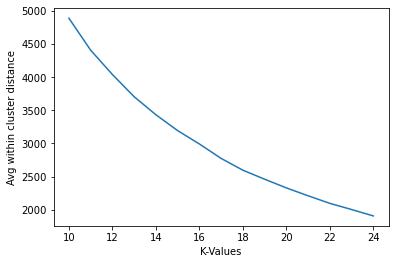

In [43]:
plt.xlabel("K-Values")
plt.ylabel("Avg within cluster distance")
plt.plot(kv,lv)

In [44]:
kmed=ut.KMedians(21, 50)
loss,ppln_clusters=kmed.fit(np.asarray(red_ppln))

In [45]:
ppln_clust=[]

for i in ppln_clusters:
    df=pd.DataFrame(ppln_clusters[i])
    df['label']=i
    ppln_clust.append(df)
    
ppln_all=pd.concat(ppln_clust)


ppln_labels=ppln_all['label']
ppln_points=ppln_all.drop('label',axis=1)
print(len(ppln_clusters))

21


[]

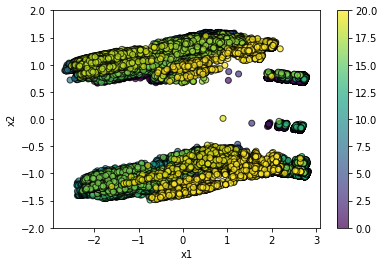

In [46]:
#Q6

p1 = PCA(50) 
sc_ppln = p1.fit_transform(ppln_points)

# p2=PCA(2)
# sc_mt5k = p2.fit_transform(sc_mt5k)

plt.scatter(sc_ppln[:, 0], sc_ppln[:, 1],
            c=ppln_labels,alpha=0.7,edgecolor='black')
plt.xlabel('x1')
plt.ylabel('x2')
plt.ylim([-2,2])
plt.colorbar()
plt.plot()

In [47]:
#temp
kmed=ut.KMedians(21, 50)
loss,mt5k_clusters=kmed.fit(np.asarray(red_mt5k))
mt5k_clust=[]

for i in mt5k_clusters:
    df=pd.DataFrame(mt5k_clusters[i])
    df['label']=i
    mt5k_clust.append(df)
    
mt5k_all=pd.concat(mt5k_clust)

mt5k_labels=mt5k_all['label']
mt5k_points=mt5k_all.drop('label',axis=1)
print(len(mt5k_clusters))

21


[]

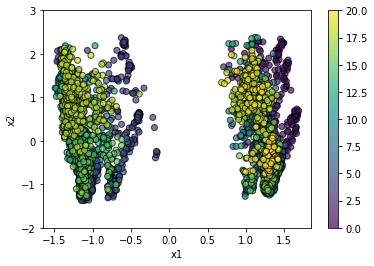

In [48]:
p2=PCA(2)
sc_mt5k = p2.fit_transform(mt5k_points)
plt.scatter(sc_mt5k[:, 0], sc_mt5k[:, 1],
            c=mt5k_labels,alpha=0.7,edgecolor='black')

plt.xlabel('x1')
plt.ylabel('x2')
plt.ylim([-2, 3])
plt.colorbar()
plt.plot()

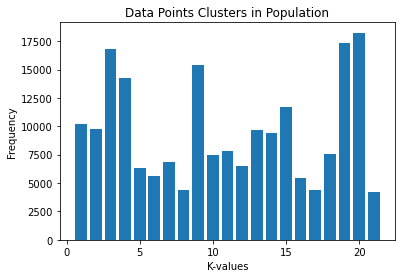

In [53]:
pca = PCA(50)

new = red_ppln

n = pca.fit_transform(new)

one_hot = red_ppln

kmed = ut.KMedians(n_clusters=21,n_dimensions = 50)

kmed.fit(np.array(n))

one_hot_pred = kmed.predict(np.array(one_hot))

# print(one_hot_pred)

freq = pd.Series(one_hot_pred).value_counts()



x = [i for i in range(1,22)]
y = np.array([freq[i] for i in range(21)])

plt.title("Data Points Clusters in Population")
plt.xlabel("K-values")
plt.ylabel("Frequency")

plt.bar(x,y)
plt.show()



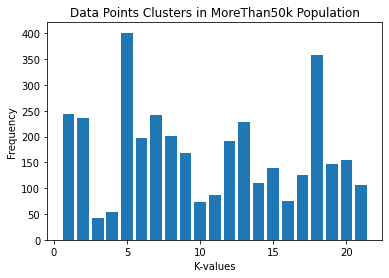

In [54]:
pca = PCA(50)

new = red_mt5k

n = pca.fit_transform(new)

one_hot = red_mt5k

kmed = ut.KMedians(n_clusters=21,n_dimensions = 50)

kmed.fit(np.array(n))

one_hot_pred = kmed.predict(np.array(one_hot))

# print(one_hot_pred)

freq = pd.Series(one_hot_pred).value_counts()

# print(freq)

freq = pd.Series(one_hot_pred).value_counts()

# print(freq)

x = [i for i in range(1,22)]
y50k = np.array([freq[i] for i in range(21)])

plt.title("Data Points Clusters in MoreThan50k Population")
plt.xlabel("K-values")
plt.ylabel("Frequency")

plt.bar(x,y50k)
plt.show()

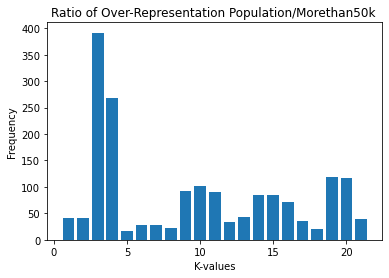

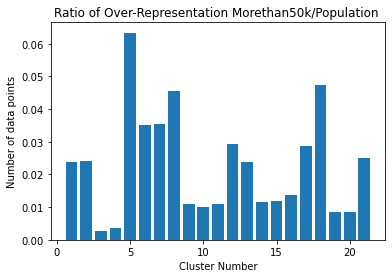

In [55]:
y = y*100.0
y50k = y50k*100.0

r1 = y/y50k

plt.title("Ratio of Over-Representation Population/Morethan50k ")
plt.xlabel("K-values")

plt.ylabel("Frequency")
plt.bar(x,r1)
plt.show()


r2 = y50k/y

plt.title("Ratio of Over-Representation Morethan50k/Population ")

plt.xlabel("Cluster Number")

plt.ylabel("Number of data points")

plt.bar(x,r2)

plt.show()